In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [3]:
df.describe().T

count         mean         std        min  \
Temperature (C)           96453.0    11.932678    9.551546 -21.822222   
Apparent Temperature (C)  96453.0    10.855029   10.696847 -27.716667   
Humidity                  96453.0     0.734899    0.195473   0.000000   
Wind Speed (km/h)         96453.0    10.810640    6.913571   0.000000   
Wind Bearing (degrees)    96453.0   187.509232  107.383428   0.000000   
Visibility (km)           96453.0    10.347325    4.192123   0.000000   
Loud Cover                96453.0     0.000000    0.000000   0.000000   
Pressure (millibars)      96453.0  1003.235956  116.969906   0.000000   

                                  25%        50%          75%          max  
Temperature (C)              4.688889    12.0000    18.838889    39.905556  
Apparent Temperature (C)     2.311111    12.0000    18.838889    39.344444  
Humidity                     0.600000     0.7800     0.890000     1.000000  
Wind Speed (km/h)            5.828200     9.9659    14.135800    63.852600  
Wind Bearing (degrees)     116.000000   180.0000   290.000000   359.000000  
Visibility (km)              8.339800    10.0464    14.812000    16.100000  
Loud Cover                   0.000000     0.0000     0.000000     0.000000  
Pressure (millibars)      1011.900000  1016.4500  1021.090000  1046.380000

In [4]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

#### We replace the nan values in the Precip Type column with no rain

In [5]:
df["Precip Type"].fillna("no rain", inplace= True)

/var/folders/28/xbmmwffs6nz2lrzpyvhgb8y00000gn/T/ipykernel_53492/133990852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Precip Type"].fillna("no rain", inplace= True)


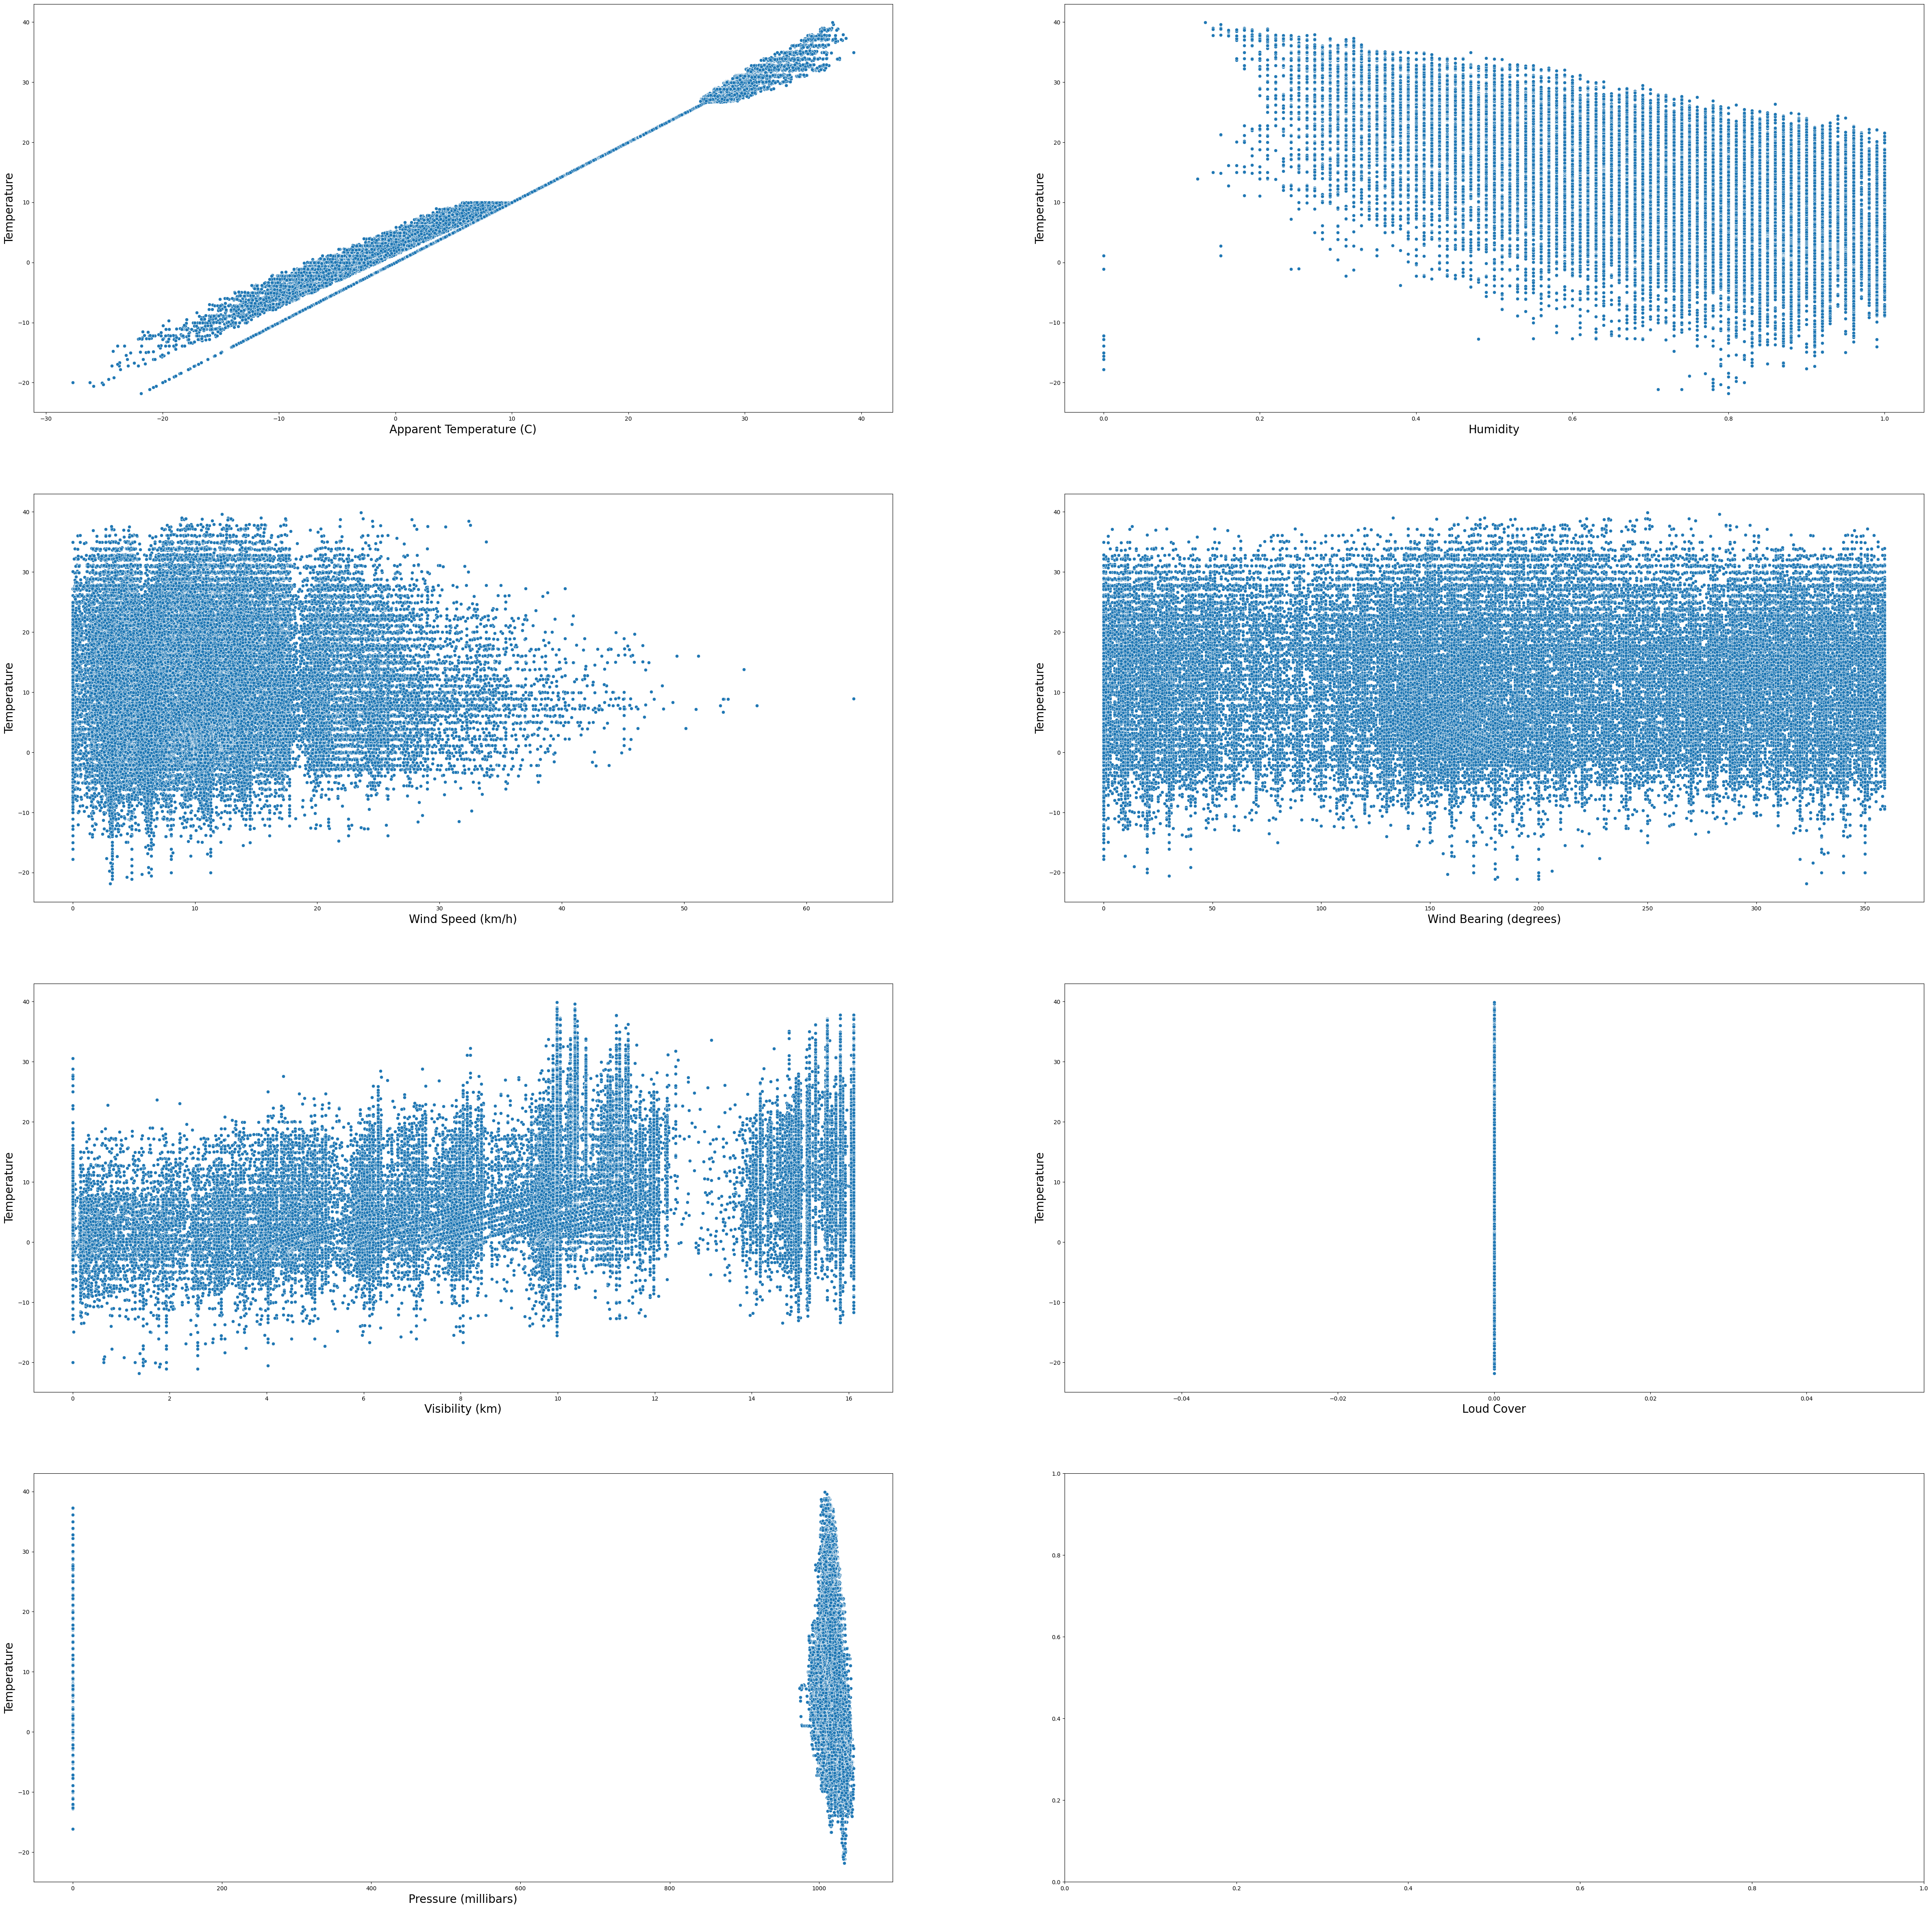

In [6]:
fig, axis = plt.subplots(4, 2, figsize = (60,60))

for col, ax in zip(df.iloc[:, 4:].select_dtypes(np.number).columns, axis.ravel()):
    sns.scatterplot(data = df, x = df[col], y = "Temperature (C)", ax = ax)
    ax.set_xlabel(col, fontsize = 20)
    ax.set_ylabel("Temperature", fontsize = 20)

In [7]:
df.drop(columns = ["Loud Cover"], inplace = True)

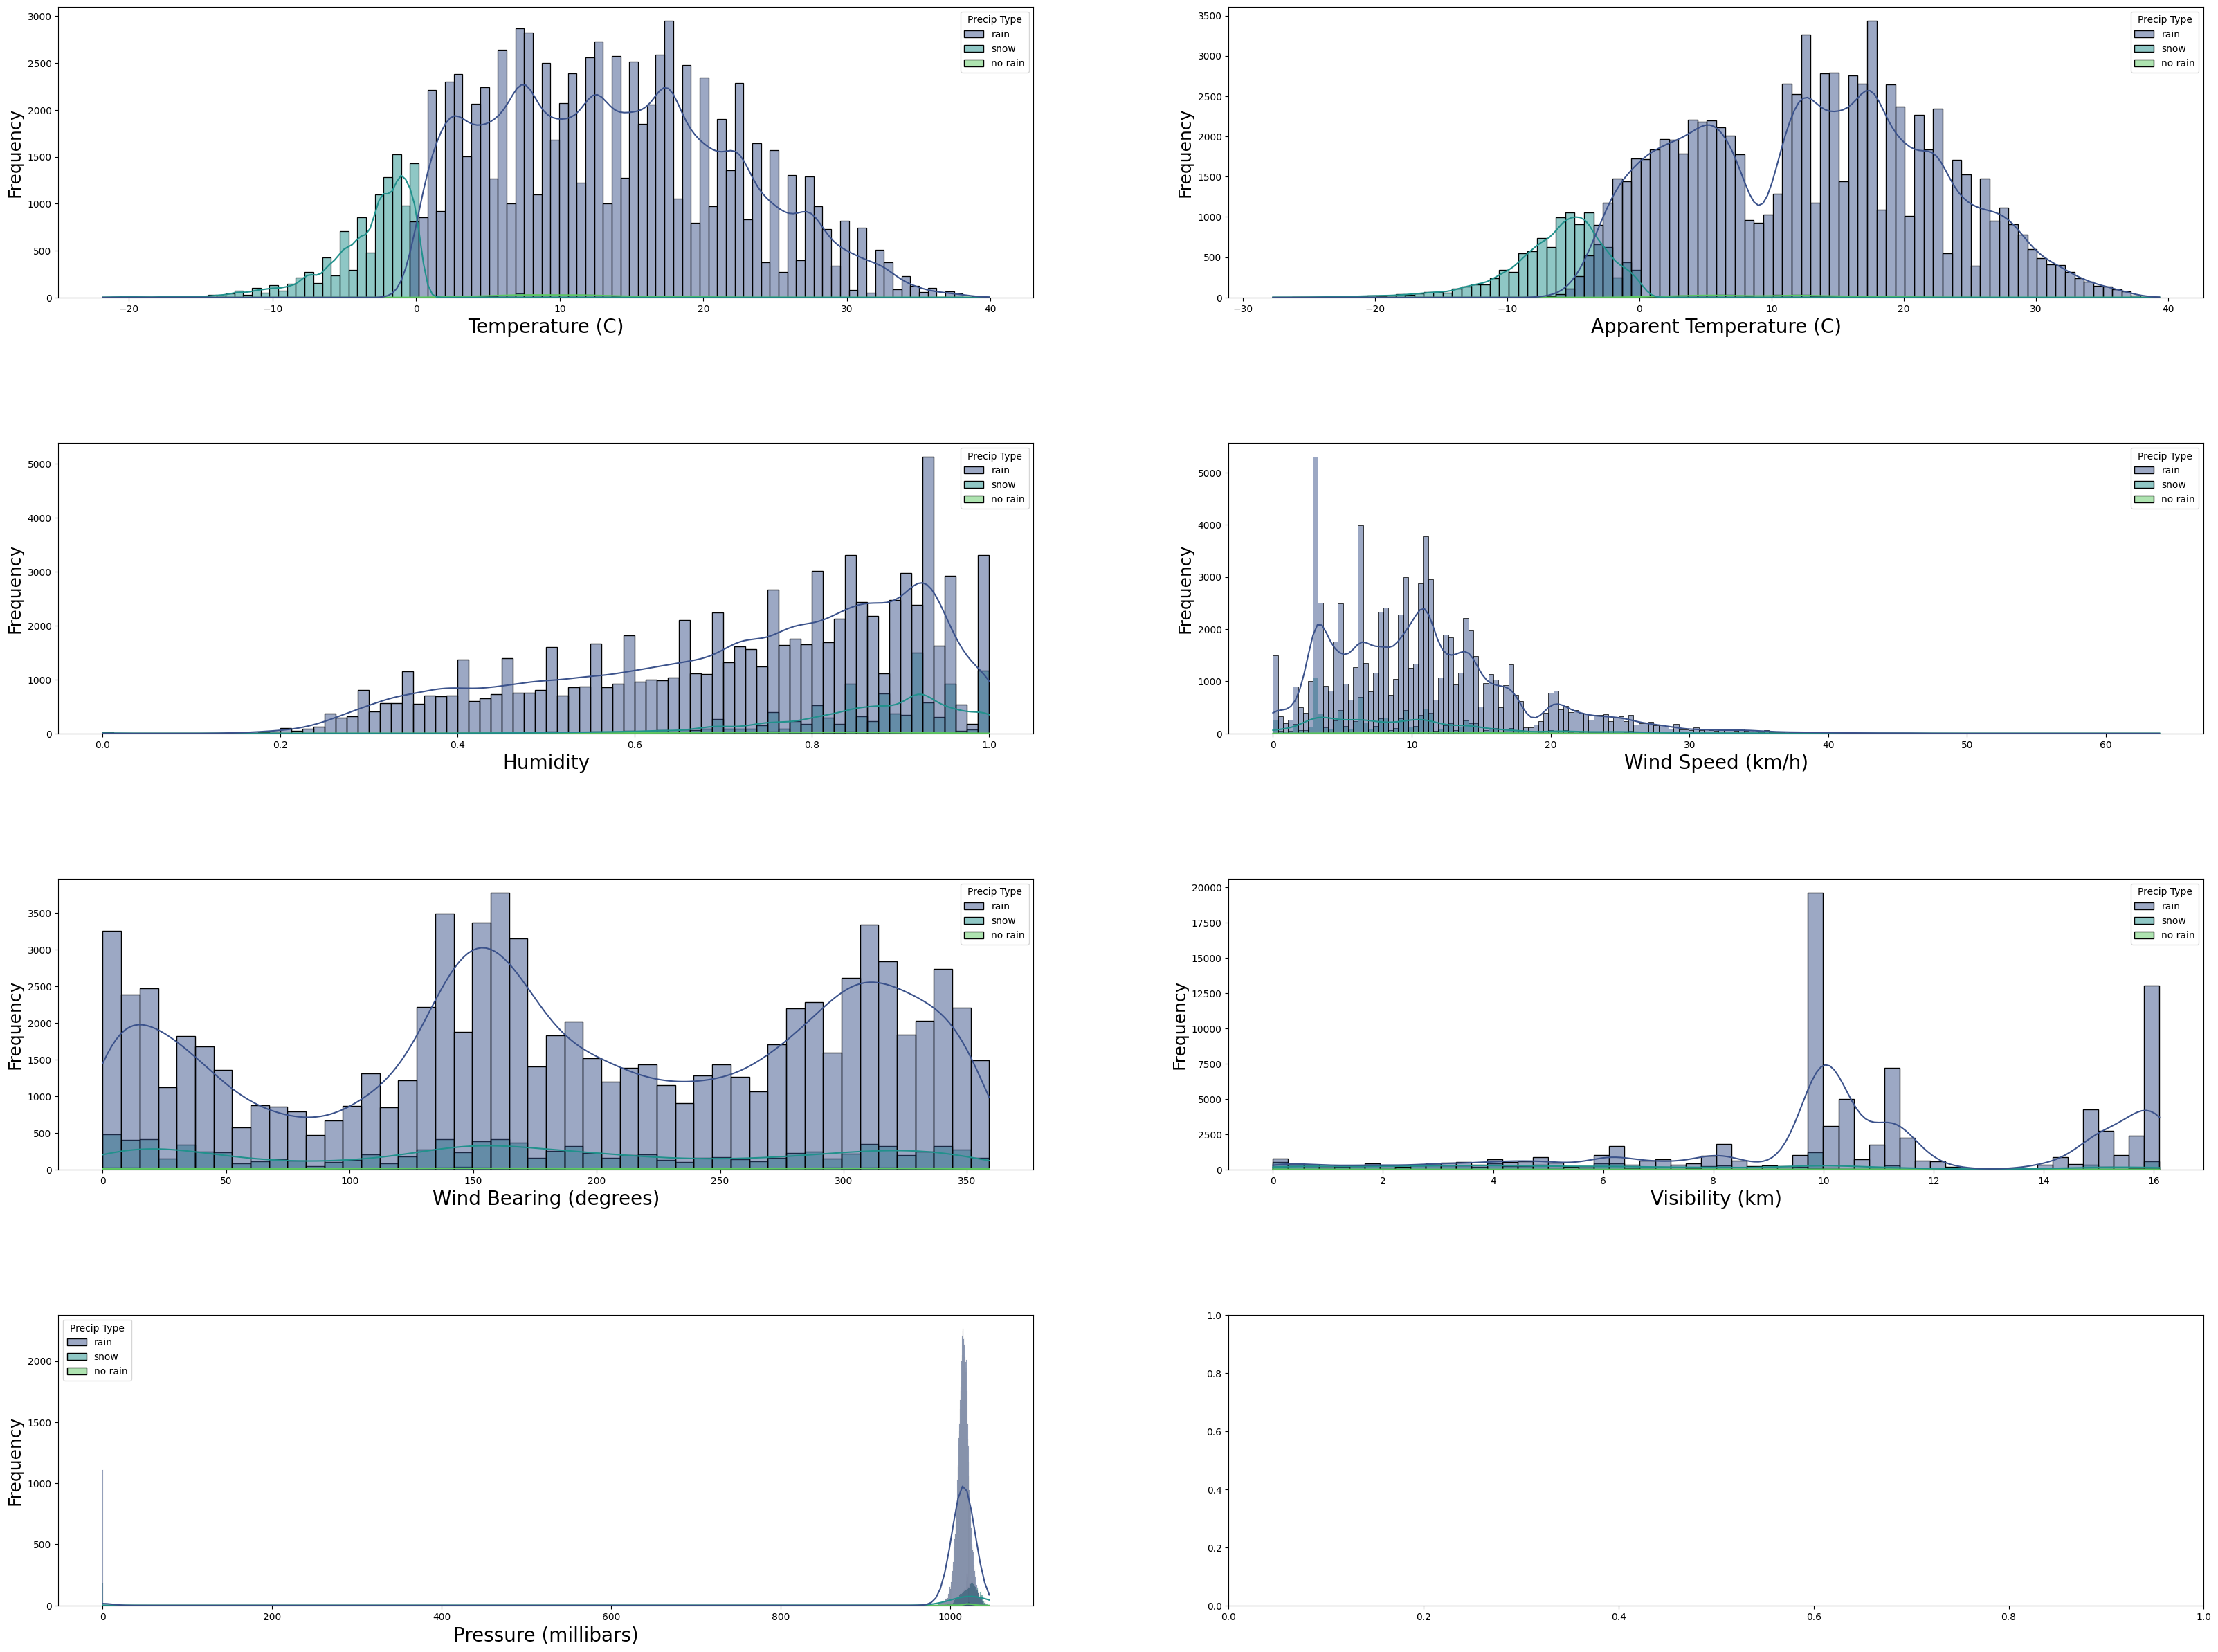

In [8]:
fig, axis = plt.subplots(4, 2, figsize = (40,30))
plt.subplots_adjust(hspace = 0.5)
for col, ax in zip(df.select_dtypes(np.number).columns, axis.ravel()):
    sns.histplot(data = df, x = df[col], ax = ax, kde = True, palette = "viridis", hue = "Precip Type")
    ax.set_xlabel(col, fontsize = 20)
    ax.set_ylabel("Frequency", fontsize = 18)

In [9]:
X = df["Humidity"].values
y = df["Apparent Temperature (C)"].values

### Applying the standard scaler to our features and output

In [10]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

### Splitting the data into training and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### Training our SVR Model

In [12]:
svr = SVR(kernel = "rbf")
svr.fit(X_train, y_train)

/Users/abjodas/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

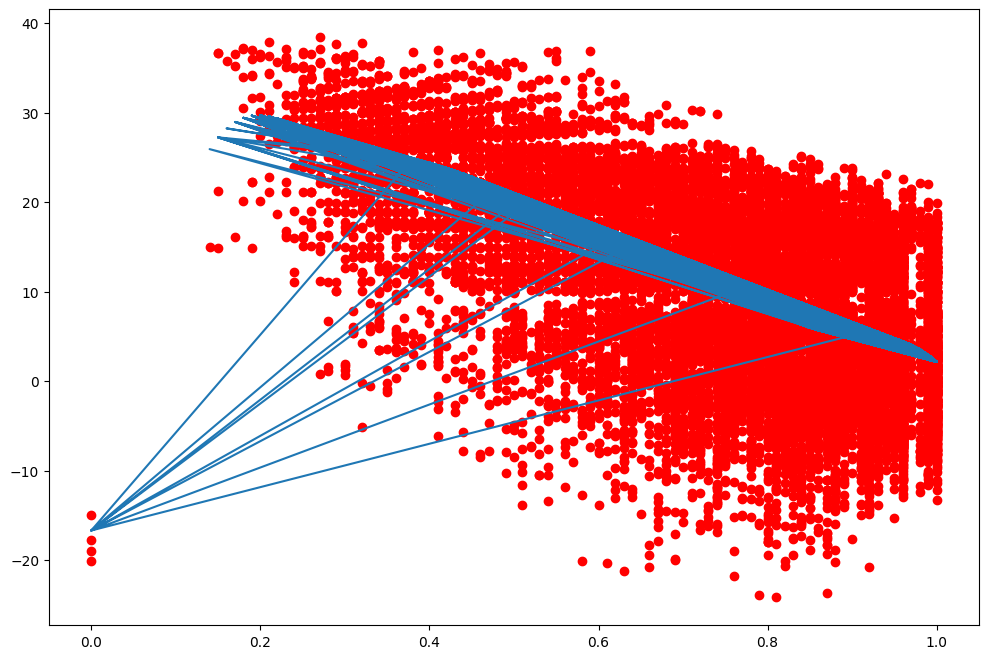

In [16]:
plt.figure(figsize = (12,8))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = "red")
plt.plot(sc_X.inverse_transform(X_test), sc_y.inverse_transform(svr.predict(X_test).reshape(-1,1)))

In [17]:
X = df["Humidity"].values
y = df["Apparent Temperature (C)"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [19]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

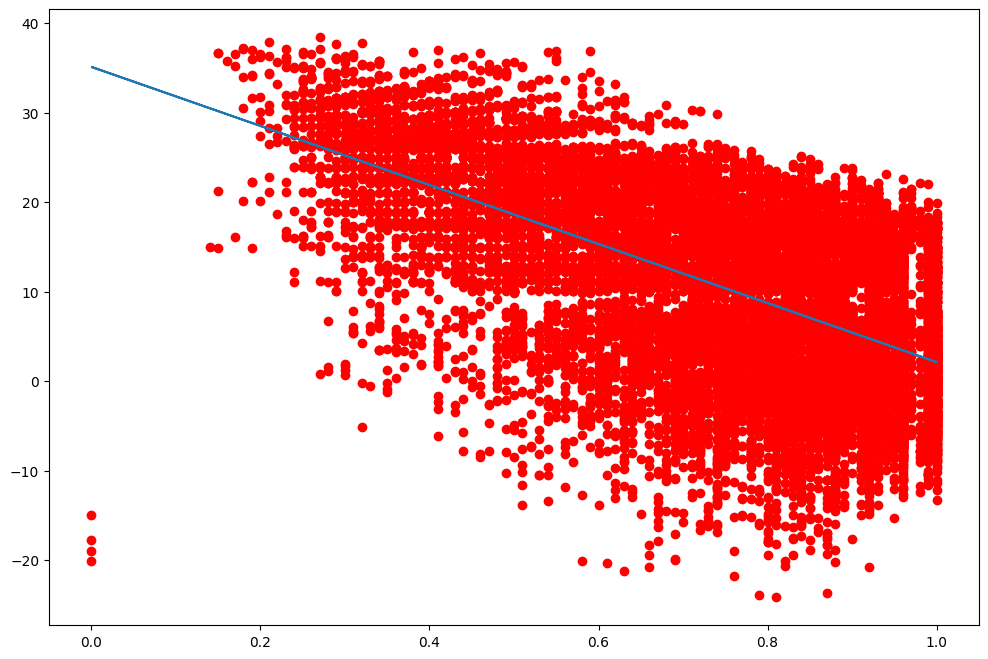

In [22]:
plt.figure(figsize = (12, 8))
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, linear_regressor.predict(X_test.reshape(-1,1)))

In [31]:
X = df["Humidity"].values
y = df["Apparent Temperature (C)"].values
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)
polyreg = LinearRegression()
polyreg.fit(X_train, y_train)

LinearRegression()

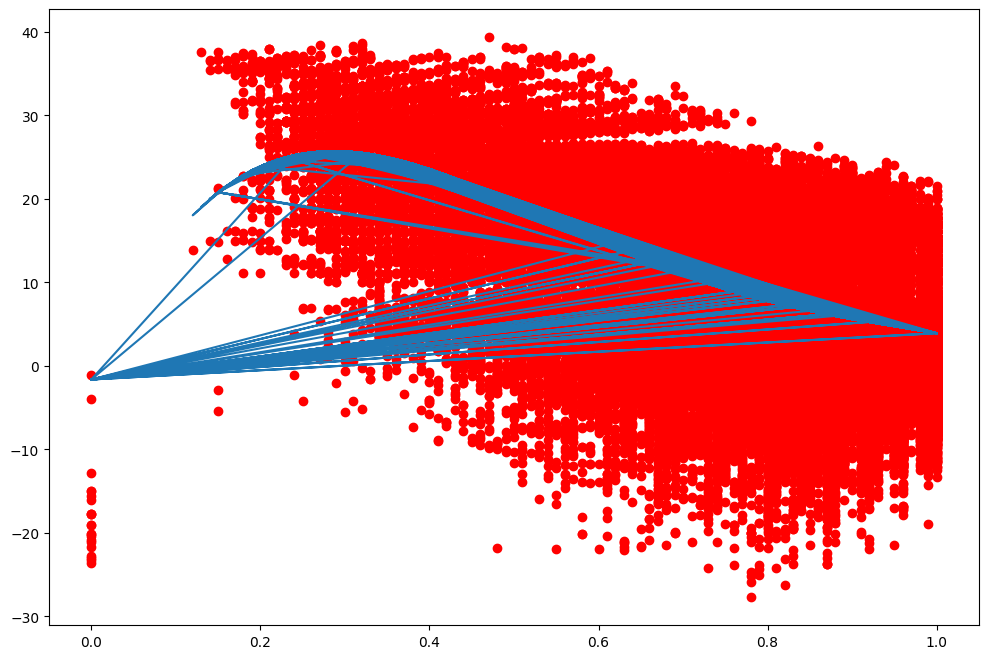

In [36]:
plt.figure(figsize = (12, 8))
plt.scatter(X, y, color = 'red')
plt.plot(X, polyreg.predict(poly.fit_transform(X.reshape(-1,1))))